In [27]:
import netCDF4

In [28]:
import numpy as np

In [53]:
import cartopy.crs as ccrs

In [30]:
from mpl_toolkits.basemap import Basemap

In [31]:
from netCDF4 import Dataset 

In [32]:
import matplotlib.pyplot as plt

In [33]:
import xarray as xr 

In [43]:
Dataset=(r'/Users/chiaraciscato/Desktop/geomar/FOCI data/CO2flux_baseline_ensemble1_ssp126_1m.nc')

In [45]:
ds = xr.open_dataset(Dataset)

In [46]:
lats = data.variables['nav_lat'][:]
lons = data.variables['nav_lon'][:]
time = data.variables['time_centered'][:]
co2flux = data.variables['co2flux_cpl'][:]

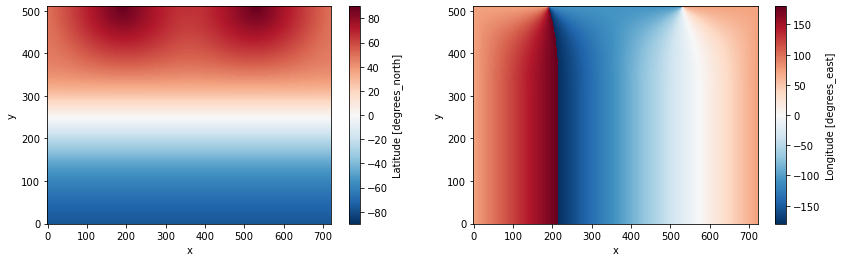

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 4))
ds.nav_lat.plot(ax=ax1)
ds.nav_lon.plot(ax=ax2)

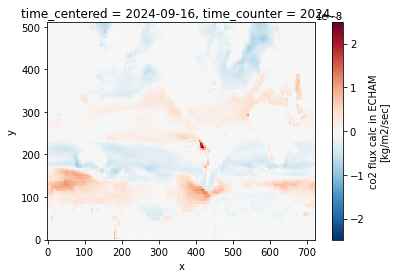

In [42]:
ds.co2flux_cpl[116].plot()

/opt/anaconda3/envs/co2exchange/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


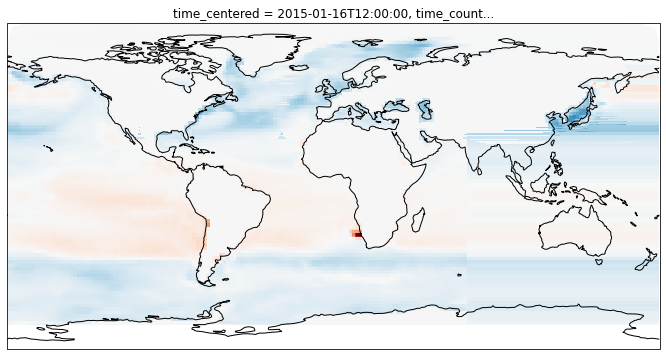

In [55]:
plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ds.co2flux_cpl[0].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", add_colorbar=False
)
ax.coastlines()

In [20]:
mp = Basemap(projection = 'merc', #mercator projection
             llcrnrlon = 84.652705,
             llcrnrlat = -8.335918,
             urcrnrlon = 7.031337,
             urcrnrlat = 57.277009,
             resolution = 'l' )

In [21]:
lons = np.arange(-90, 91, 1)
lats = np.arange(-180, 180, 1)

In [ ]:
lon, lat = np.meshgrid(lons, lats)
x, y = mp(lon, lat)

In [ ]:
c_scheme = mp.pcolor(x, y, np.squeeze(co2flux[0,:,:]), cmap = 'jet') #colormap
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

In [ ]:
cbar = mp.colorbar(c_scheme, location = 'right', pad = '10%')

In [ ]:
plt.title("CO2 flux - Baseline")
plt.show()
#does not work

In [ ]:
ds = xr.open_dataset(r'/Users/chiaraciscato/Desktop/geomar/FOCI data/CO2flux_baseline_ensemble1_ssp126_1m.nc')  # NetCDF or OPeNDAP URL
lati = 42.4; loni = -11.8  # Georges Bank

# Extract a dataset closest to specified point
dsloc = ds.sel(lon=loni, lat=lati, method='nearest')